# 라이브러리 import

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드

In [168]:
data_path = './data/'

In [169]:
sale_2016 = pd.read_csv(data_path + 'train_2016.csv')
sale_2016['date'] = pd.to_datetime(sale_2016['date'], format='%Y-%m-%d')

In [170]:
sale_2016

,date,store_nbr,item_nbr,unit_sales
0,2016-01-01,25,105574,12.0
1,2016-01-01,25,105575,9.0
2,2016-01-01,25,105857,3.0
3,2016-01-01,25,108634,3.0
4,2016-01-01,25,108701,2.0
...,...,...,...,...
35229866,2016-12-31,54,2048381,6.0
35229867,2016-12-31,54,2048421,4.0
35229868,2016-12-31,54,2048471,10.0
35229869,2016-12-31,54,2048515,3.0


In [171]:
sale_2016= sale_2016[sale_2016["store_nbr"] == 25]
sale_2016= sale_2016[sale_2016["item_nbr"] == 105574]
sale_2016

,date,store_nbr,item_nbr,unit_sales
0,2016-01-01,25,105574,12.0
46607,2016-01-02,25,105574,16.0
147190,2016-01-03,25,105574,9.0
246245,2016-01-04,25,105574,4.0
341760,2016-01-05,25,105574,6.0
...,...,...,...,...
34738111,2016-12-27,25,105574,8.0
34842774,2016-12-28,25,105574,1.0
34949141,2016-12-29,25,105574,16.0
35056945,2016-12-30,25,105574,12.0


# 데이터 전처리

In [172]:
df = sale_2016.copy()
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [173]:
df.set_index(df['date'], inplace=True)
df = df.drop('date', axis=1)
df

,store_nbr,item_nbr,unit_sales
date,,,
2016-01-01,25,105574,12.0
2016-01-02,25,105574,16.0
2016-01-03,25,105574,9.0
2016-01-04,25,105574,4.0
2016-01-05,25,105574,6.0
...,...,...,...
2016-12-27,25,105574,8.0
2016-12-28,25,105574,1.0
2016-12-29,25,105574,16.0


# 월별 통계

## 합산

In [174]:
monthly_sum = df.groupby([lambda x: x.year, lambda x: x.month]).sum()

In [175]:
monthly_sum

store_nbr  item_nbr  unit_sales
2016 1         750   3167220       164.0
     2         725   3061646       275.0
     3         775   3272794       346.0
     4         700   2956072       176.0
     5         650   2744924       143.0
     6         750   3167220       115.0
     7         750   3167220       149.0
     8         525   2217054       132.0
     10        125    527870        26.0
     11        625   2639350        87.0
     12        650   2744924       146.0

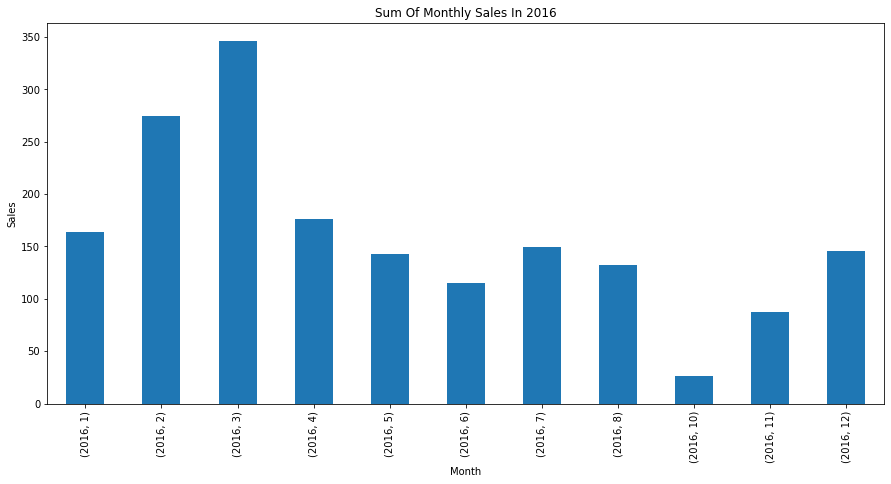

In [176]:
plt.figure(figsize=(15, 7))

plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
monthly_sum['unit_sales'].plot(kind='bar')
plt.title('Sum Of Monthly Sales In 2016')

plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

## 평균 & 표준편차

In [177]:
monthly_mean = df.groupby([lambda x: x.year, lambda x: x.month]).mean()
monthly_stdev = df.groupby([lambda x: x.year, lambda x: x.month])

In [178]:
monthly_mean

store_nbr  item_nbr  unit_sales
2016 1          25    105574    5.466667
     2          25    105574    9.482759
     3          25    105574   11.161290
     4          25    105574    6.285714
     5          25    105574    5.500000
     6          25    105574    3.833333
     7          25    105574    4.966667
     8          25    105574    6.285714
     10         25    105574    5.200000
     11         25    105574    3.480000
     12         25    105574    5.615385

In [179]:
monthly_stdev

In [181]:
#p = monthly_mean['unit_sales'].plot(figsize=(15,5), legend=True, kind="bar", yerr=monthly_stdev['unit_sales']);
#p.set_title("Monthly Mean And Standard Deviation Of Sales In 2016", fontsize=18);
#p.set_xlabel("Month", fontsize=18);
#p.set_ylabel("Sales", fontsize=18);
#p.set_ylim(0,70);

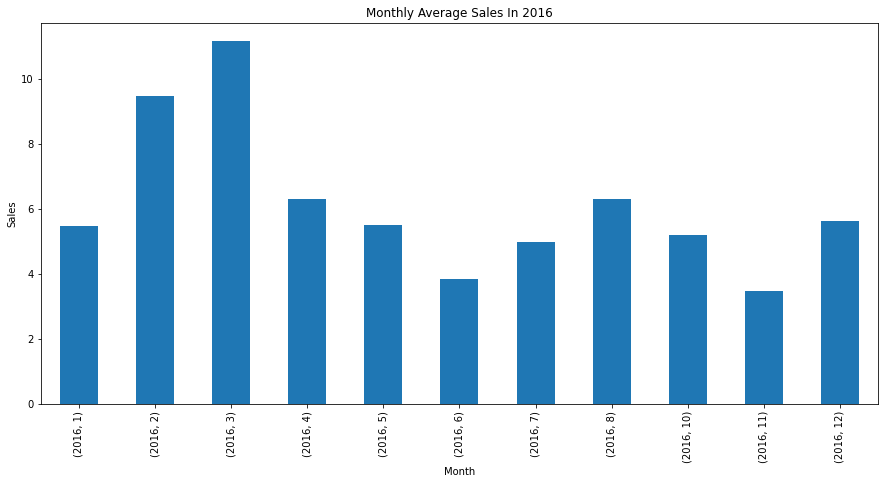

In [183]:
plt.figure(figsize=(15, 7))

plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
monthly_mean['unit_sales'].plot(kind='bar')
plt.title('Monthly Average Sales In 2016')

plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

# 주간 통계

In [184]:
df = sale_2016.copy()
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [185]:
weekly_sum = df.groupby([pd.Grouper(key='date', freq='W-MON')])['unit_sales'].sum().reset_index().sort_values('date')

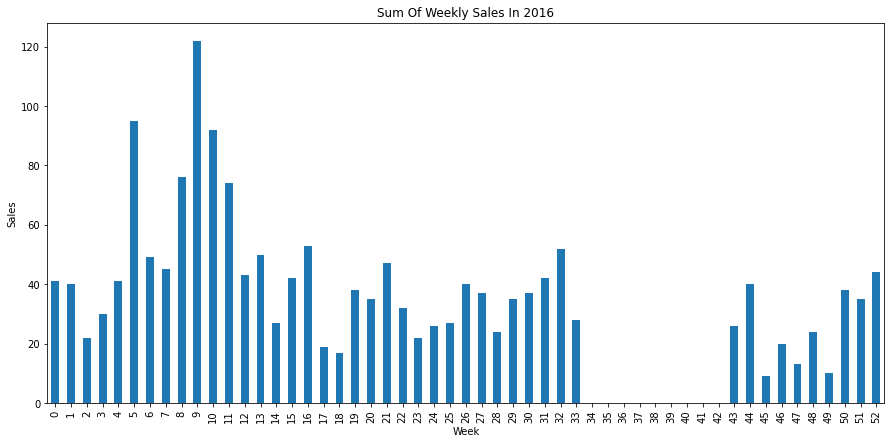

In [186]:
plt.figure(figsize=(15, 7))

plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
weekly_sum['unit_sales'].plot(kind='bar')
plt.title('Sum Of Weekly Sales In 2016')

plt.xlabel('Week')
plt.ylabel('Sales')
plt.show()

In [187]:
weekly_mean = df.groupby([pd.Grouper(key='date', freq='W-MON')])['unit_sales'].mean().reset_index().sort_values('date')

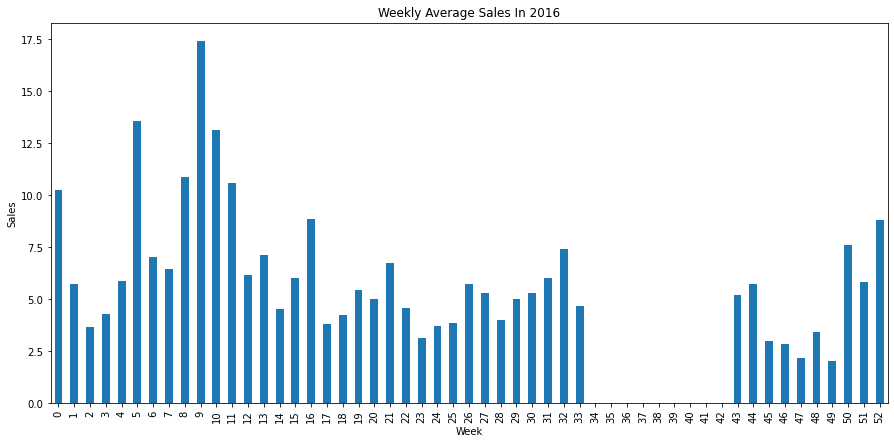

In [188]:
plt.figure(figsize=(15, 7))

plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
weekly_mean['unit_sales'].plot(kind='bar')
plt.title('Weekly Average Sales In 2016')

plt.xlabel('Week')
plt.ylabel('Sales')
plt.show()

# 연간 통계

In [189]:
df = sale_2016.copy()
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [190]:
annual_sum = df.groupby([pd.Grouper(key='date', freq='Y')])['unit_sales'].sum().reset_index().sort_values('date')

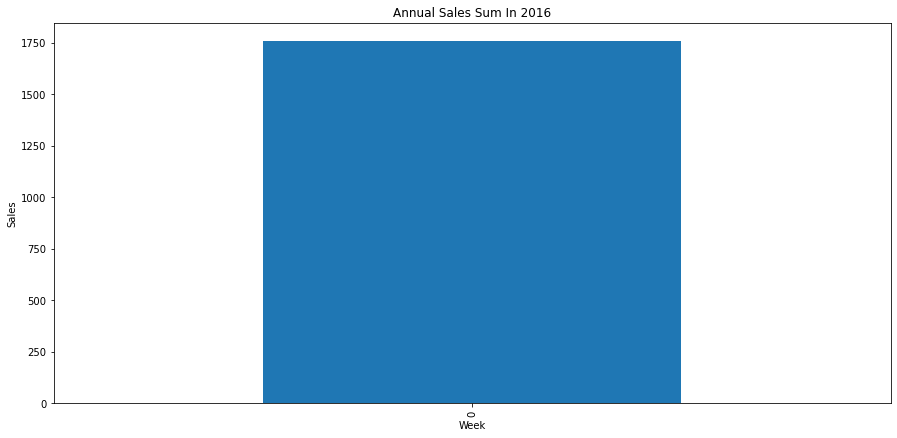

In [191]:
plt.figure(figsize=(15, 7))

plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
annual_sum['unit_sales'].plot(kind='bar')
plt.title('Annual Sales Sum In 2016')

plt.xlabel('Week')
plt.ylabel('Sales')
plt.show()

# 저장 (임시 => 추후 데이터베이스 연동)

## 월간 평균 저장

In [192]:
df = monthly_mean.copy()
df = df.drop(['store_nbr', 'item_nbr'], axis=1)
df = df.reset_index()
df['date'] = pd.to_datetime(dict(year=df.level_0, month=df.level_1, day=1))
df['date'] = df['date'].dt.to_period('M')
df = df[['date', 'unit_sales']]
df.rename(columns={'unit_sales': 'sales'}, inplace=True)

In [193]:
df.to_csv('../../Web/WebContent/monthly_mean.csv', index=False)

## 월간 합계 저장

In [194]:
df = monthly_sum.copy()
df = df.drop(['store_nbr', 'item_nbr'], axis=1)
df = df.reset_index()
df['date'] = pd.to_datetime(dict(year=df.level_0, month=df.level_1, day=1))
df['date'] = df['date'].dt.to_period('M')
df = df[['date', 'unit_sales']]
df.rename(columns={'unit_sales': 'sales'}, inplace=True)

In [195]:
df.to_csv('../../Web/WebContent/monthly_sum.csv', index=False)